In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pan

In [2]:
!pip install --upgrade pandas pandasai

     ---------------------------------------- 10.7/10.7 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 40.4/40.4 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 73.6/73.6 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 798.7/798.7 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 323.1/323.1 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 44.4/44.4 kB 363.2 kB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Krishna\\anaconda3\\Lib\\site-packages\\~atplotlib\\ft2font.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Q1. Compute the mean, median and the mode of the data

In [3]:
x=pd.DataFrame([57, 61 ,57 ,57, 58, 57, 61, 54 ,68,
51, 49, 64, 50, 48, 65, 52, 56, 46,
54, 49, 50, 47, 55, 55, 54, 42, 51,
56, 55 ,54 ,51 ,60, 62, 43, 55, 56,
61 ,52 ,69 ,64 ,46 ,54])

In [4]:
print(np.mean(x)[0],np.median(x),x.index[x.max()])

IndexError: index 69 is out of bounds for axis 0 with size 42

Q2. Compute the range , variance and standard deviation of CEO ages


In [5]:
print('Range:',np.min(x)[0],'-',np.max(x)[0])

Range: 42 - 69


In [6]:
np.var(x)[0]

38.51473922902494

In [7]:
sd=np.std(x,ddof=1)[0]

Q3. Find the mean deviation for the data . The mean deviation is defined asbelow

In [8]:
m=np.mean(x)[0]
n=np.abs(x-m)

In [9]:
m=n.sum()[0]

In [10]:
m/len(x)

4.814058956916099

In [11]:
print('Mean Deviation:',m/len(x))

Mean Deviation: 4.814058956916099


Q4. Calculate the Pearson coefficient of skewness and comment on theskewness of 
the data
[Ameasure to determine the skewness of a distribution is called the Pearson
coefficient of skewness. The formula is
The value of the coefficient if skewness usually ranges from –3 to 3. When the
distribution is symmetric, the coefficient is zero; when the distribution is positively 
skewed , the coefficient is positive, and when the distribution is negatively skewed 
the coefficient is negative.]

In [12]:
(m-np.median(x))/len(x)

3.50453514739229

Q5. Count the number of data values that fall within two standard deviations ofthe
mean. Compare this with the answer from Chebyshev’s Theorem.

In [13]:
p=np.mean(x)[0]

In [14]:
count=0
for i in x.values:
    if(i<42.34225847389118  or i>67.46726533563263 ):
        count=count+1
print(count)

3


In [15]:
np.mean(x)[0]-2*sd

42.34225847389118

Q6. Find the three quartiles and the interquartile range (IQR).


In [16]:
q=np.quantile(x,[0.25,0.50,0.75])

Q7. Are there any outliers in the data set ?

In [17]:
iqr=q[2]-q[0]

In [18]:
q1=q[0]-iqr*1.5

In [19]:
q2=q[2]+iqr*1.5

In [20]:
q1,q2

(40.875, 67.875)

In [21]:
count=0
for i in x.values:
    if(i<q1  or i>q2 ):
        count=count+1
print(count)

2


In [22]:
#there are 2 outlier

Q8.Draw a boxplot of the dataset to confirm .

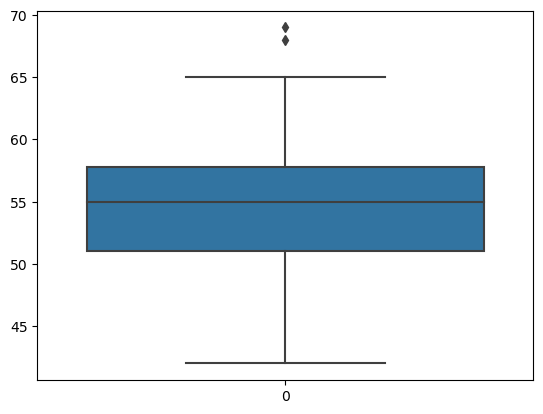

In [23]:
sns.boxplot(x)
plt.show()

Q9. Find the percentile rank of the datapoint 50.


In [24]:
rank = 50 / (100 * (len(x) + 1))
rank

0.011627906976744186

Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?

In [25]:
count=0
for i in x.values:
    if i<50:
        count=count+1

In [26]:
count/len(x)

0.19047619047619047

In [27]:
#probability 19%

Q11. Create a frequency distribution for the data and visualize it appropriately

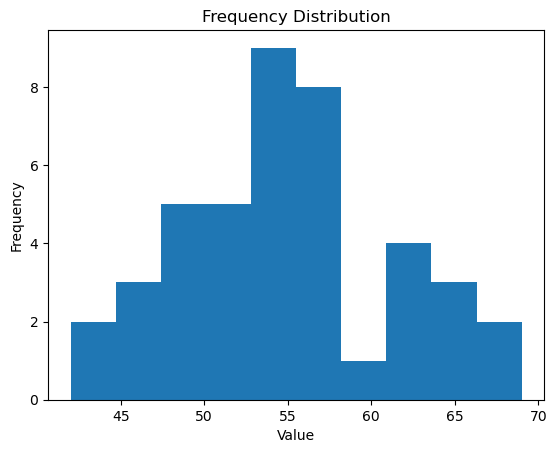

In [28]:
plt.hist(x[0],bins=10)
plt.title("Frequency Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Q12. Create a probability distribution of the data and visualize it appropriately

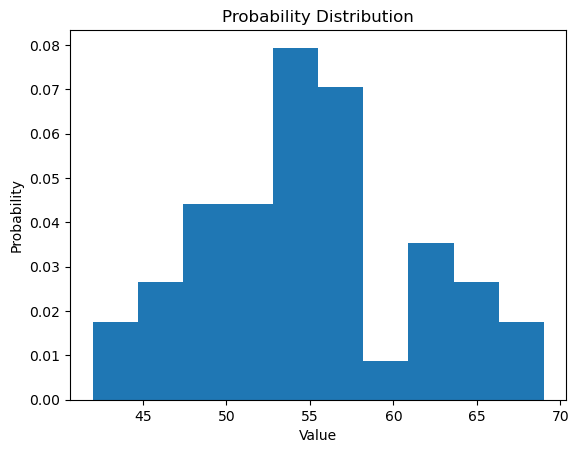

In [29]:
plt.hist(x[0], bins=10,density=True)
plt.title("Probability Distribution")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to 
determine that. Take 100 random samples with replacement from this dataset of 
size 5 each. Create a sampling distribution ofthe mean age of customers. Compare 
with other sampling distributions of sample size 10, 15, 20, 25, 30. State your 
observations. Does it corroborate the Central Limit Theorem?

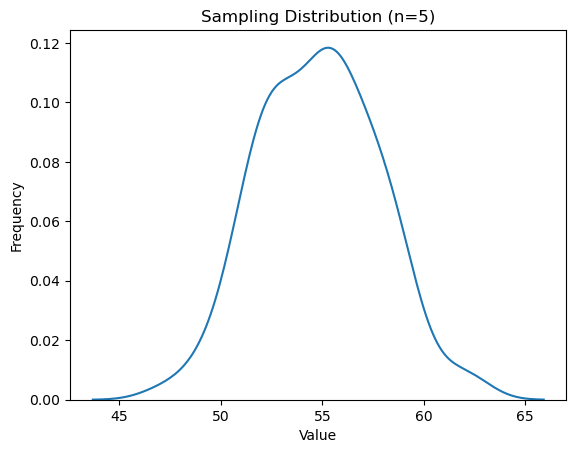

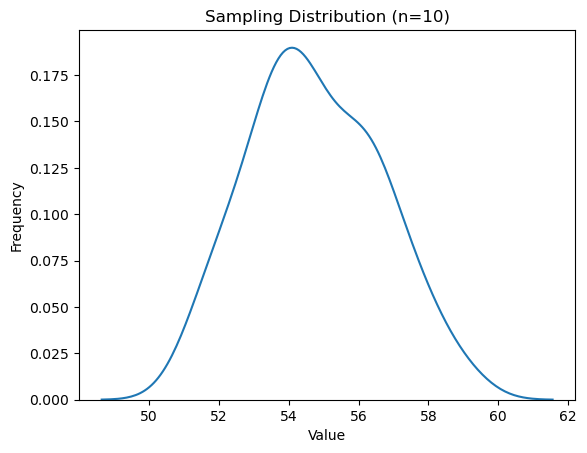

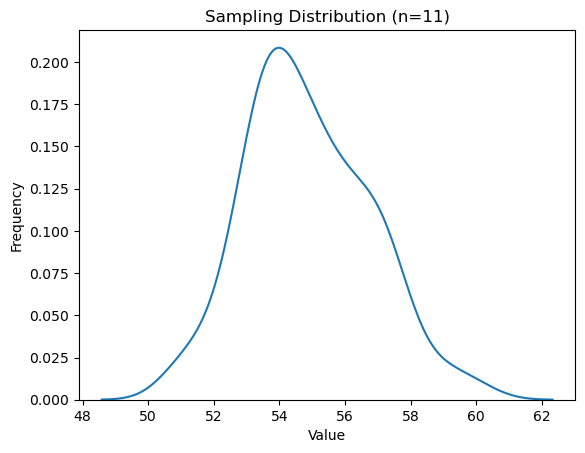

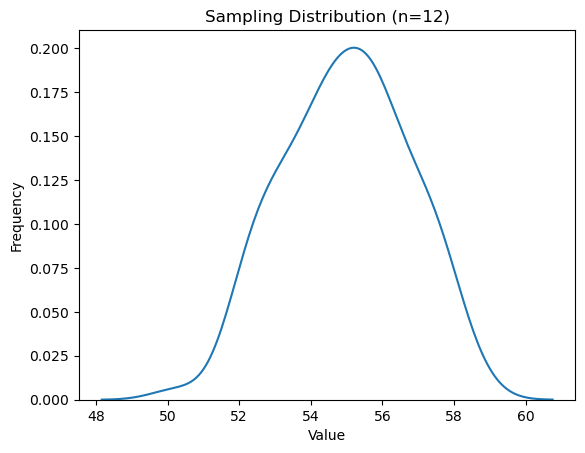

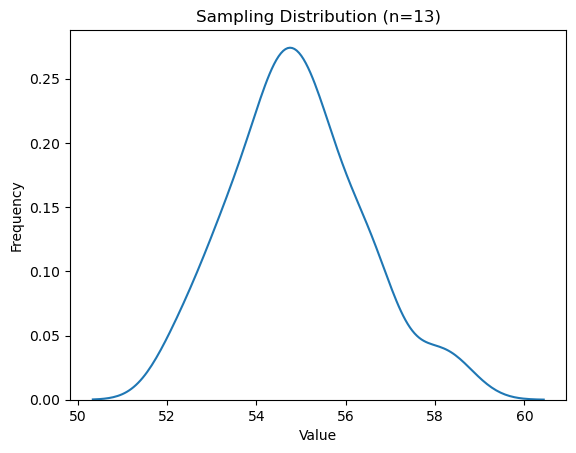

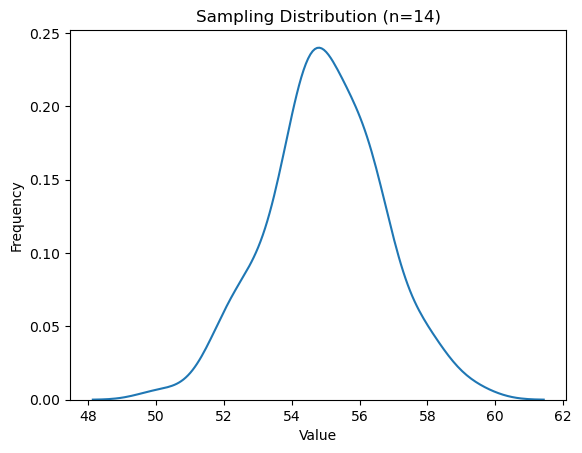

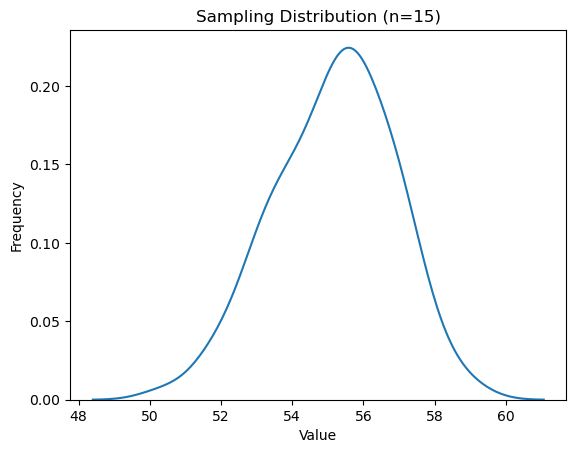

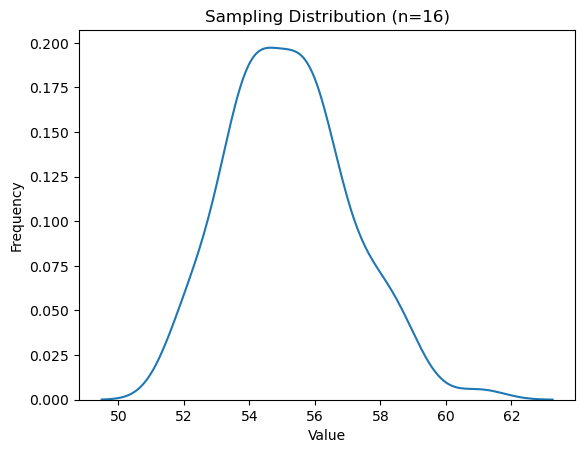

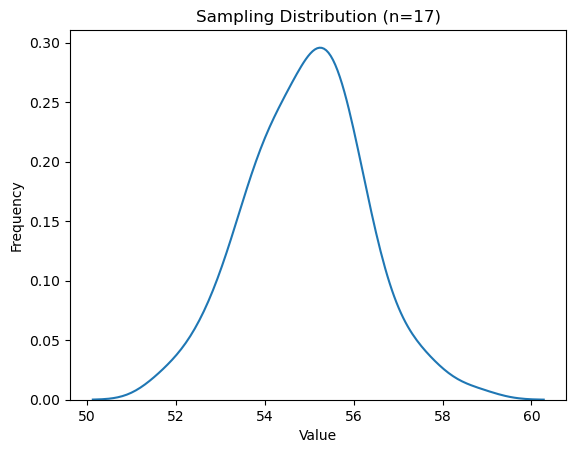

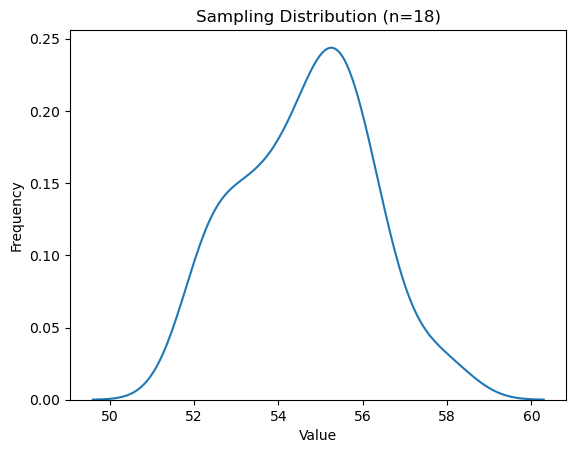

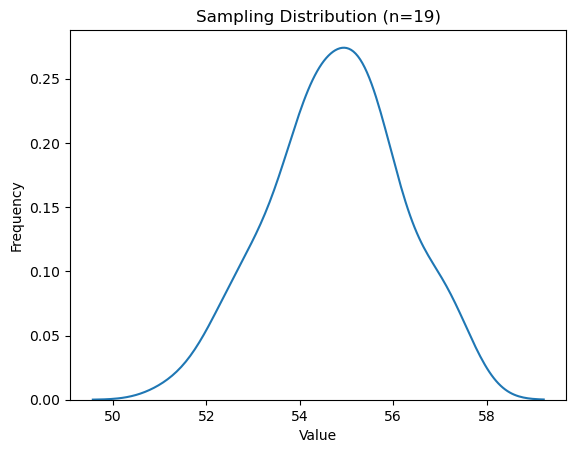

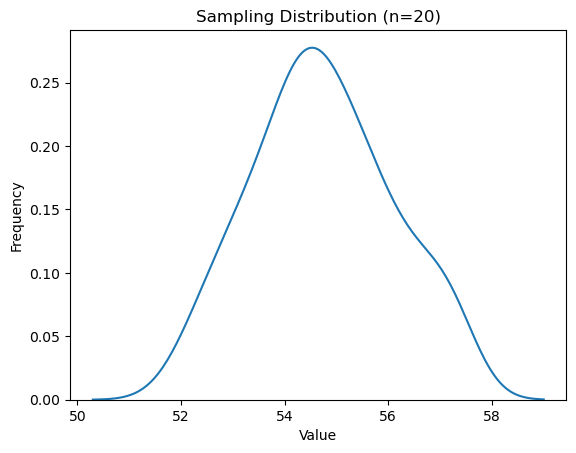

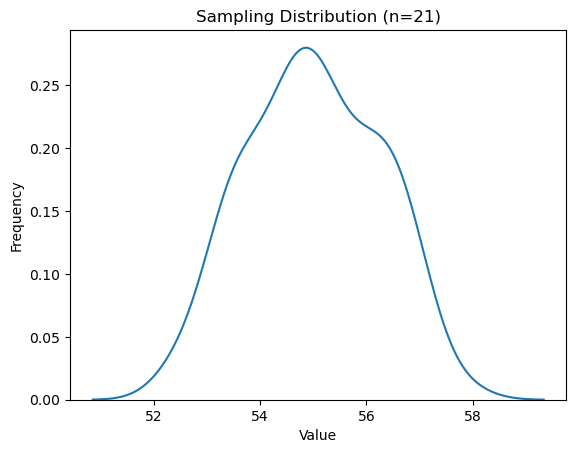

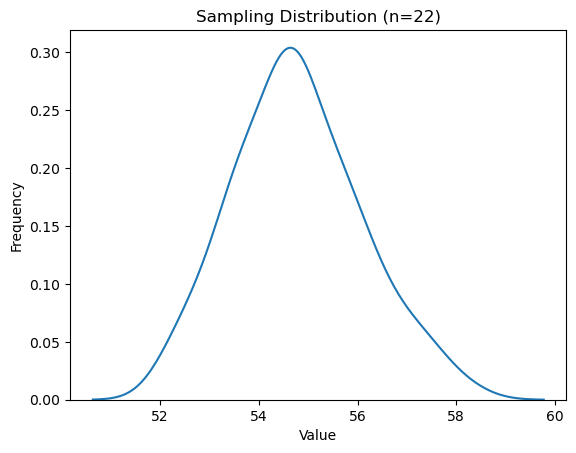

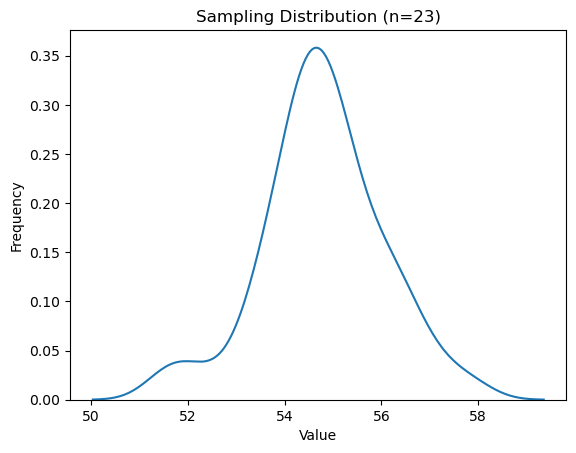

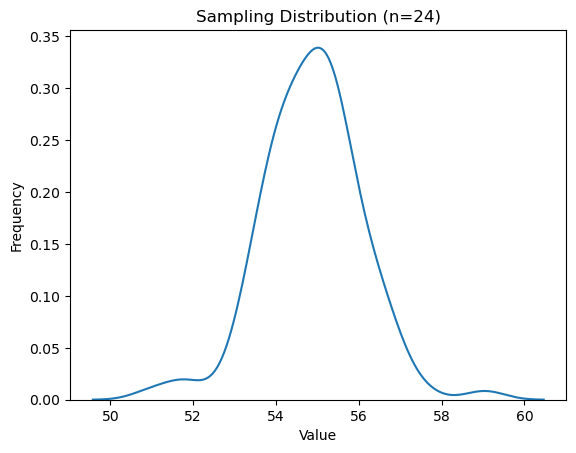

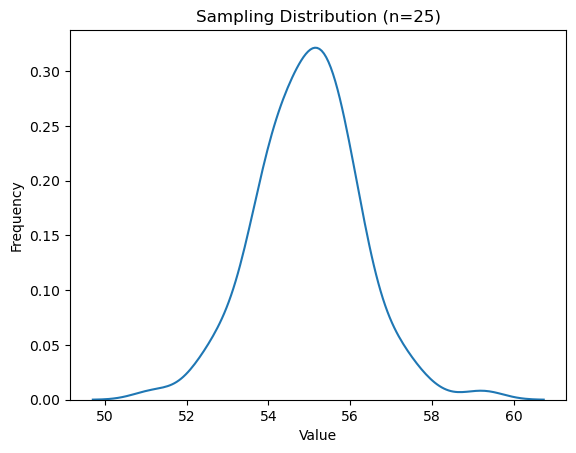

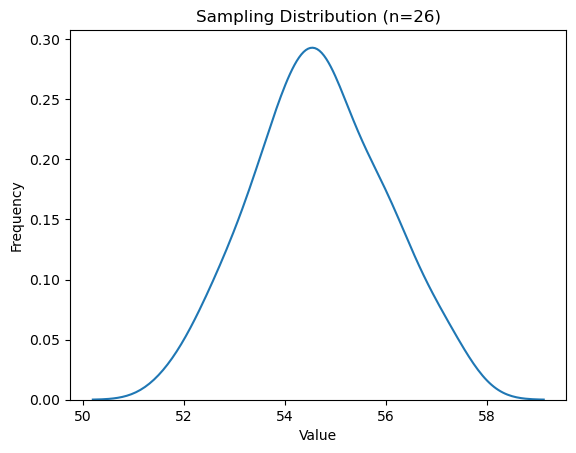

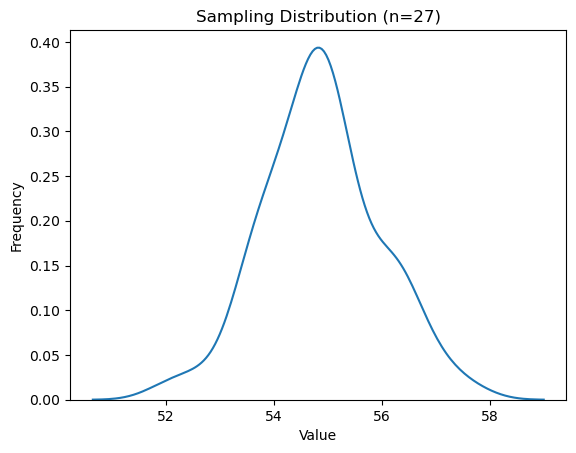

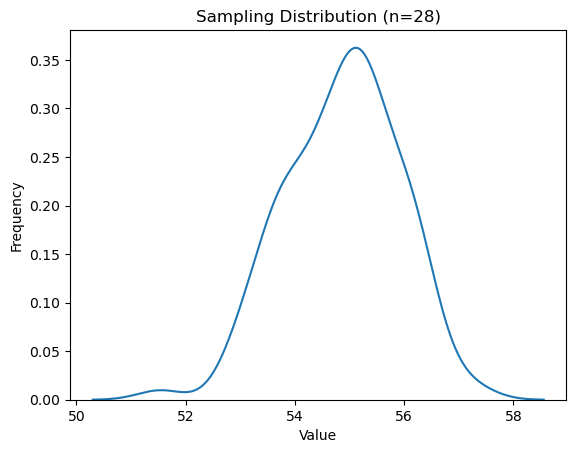

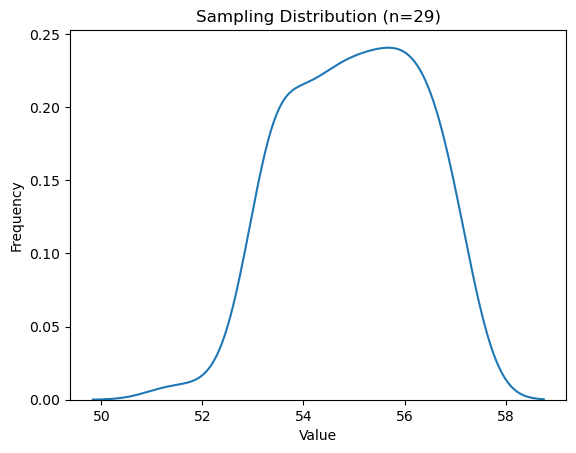

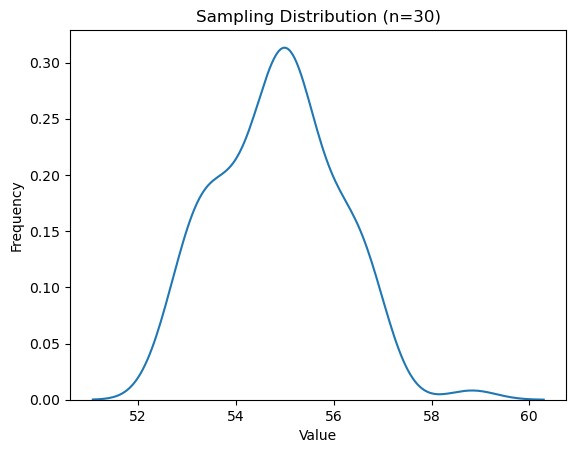

In [30]:
sample_sizes = [5] + list(range(10,31))

for sample_size in sample_sizes:
    means = []
    for i in range(100):
        sample = np.random.choice(x[0], size=sample_size)
        means.append(sample.mean())
    sns.kdeplot(means)
    plt.title(f"Sampling Distribution (n={sample_size})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [31]:
#yes they colaborate with CLT as the n>=30

Q14. Treat this dataset as a binomial distribution where p is the probability that a 
person becomes a CEO above 50 years age. What is the probability that out of a 
random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years 
of age?


In [32]:
stats.binom.pmf(p=32/50,n=10,k=6)

0.24238689853856812

Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 
60 years of age. Using the Normal approximation of a Binomial distribution, find the 
probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs
will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [33]:
p=0.25
n=300
mean=p*n
sd=np.sqrt(mean*(1-p))
sd,mean

(7.5, 75.0)

In [35]:
z=75
#p(74.5<X<75.5)

In [36]:
import math

n = 300
p = 0.25
mu = n * p
sigma = math.sqrt(n * p * (1 - p))

z1 = (75 - mu) / sigma
z2 = (76 - mu) / sigma

P = 0.5 * (1 + math.erf(z2 / math.sqrt(2)) - math.erf(z1 / math.sqrt(2)))

print(P)


0.553035116623614


Q16. Compute a 95% Confidence Interval for the true mean age of the population of 
CEOs for the given dataset using appropriate distribution.( Statereasons as to why 
did you use a z or t distribution)

In [37]:
stats.t.interval(0.95,len(x)-1,np.mean(x),np.std(x)/np.sqrt(len(x)))

(array([52.97082856]), array([56.83869525]))

Q17. A data scientist wants to estimate with 95% confidence the proportion ofCEOs 
of Fortune 500 companies are above 60 years in the population.
Another recent study showed that 25% of CEOs interviewed were above 60. The 
data scientist wants to be accurate within 2% of the true proportion. Find the
minimum sample size necessary.

In [38]:
z=1.96#alpha = 0.025
p=0.25
q=0.75
e=0.02

In [39]:
n=z**2*p*q/e**2
n
print("Minimum samaple size is:",np.ceil(n))

Minimum samaple size is: 1801.0


Q18.The same data scientist wants to estimate the true proportion of CEOs
ascending to the post and above 60 years. She wants to be 90% confident
and accurate within 5% of true proportion. Find the minimum sample size
necessary.


In [40]:
z=1.26
p=0.25
q=0.75
e=0.05

In [41]:
n=z**2*p*q/e**2
n
print("Minimum samaple size is:",np.ceil(n))

Minimum samaple size is: 120.0


Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his 
claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 
years.

In [42]:
p1=10/30
p=0.25
n=30
z=(p1-p)/np.sqrt(p*(1-p)/n)

In [43]:
z

1.0540925533894596

In [44]:
stats.norm.cdf(-z)

0.14592027257189433

In [45]:
#the research is true and we there are 25% all CEOS are above 60 years 

Q20. Assume you are a data scientist for the Fortune 500 companies. You areasked 
to research the question whether the CEO ages of UK are on average older than the
CEO ages of Americans. you take a random sample of 40 CEO ages from America 
and UK and the data is as follows:
#### UK
47 49 73 50 65 70 49 47 40 43
46 35 38 40 47 39 49 37 37 36
40 37 31 48 48 45 52 38 38 36
44 40 48 45 45 36 39 44 52 47





#### USA
47 57 52 47 48 56 56 52 50 40
46 43 44 51 36 42 49 49 40 43
39 39 22 41 45 46 39 32 36 32
32 32 37 33 44 49 44 44 49 32

* a. What are your hypotheses?
* b. What significance level will you use?
* c. What statistical test will you use?
* d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)
* e. What is your decision?
* f. What can you conclude?
* g. Do you feel that using the data given really answers the original
    question asked?
* h. What other data might be used to answer the question

In [46]:
# The mean age of CEOS of USA and UK are same.
# I will use significance level 95
# we should use t test independent

In [47]:
uk= np.array([47 ,49, 73, 50, 65, 70, 49 ,47 ,40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48 ,45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44 ,52 ,47])
usa=np.array([47 ,57, 52, 47, 48 ,56, 56, 52 ,50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41 ,45 ,46, 39, 32, 36, 32, 32, 32 ,37, 33 ,44 ,49 ,44, 44 ,49 ,32])

In [48]:
stats.ttest_ind(uk,usa)

Ttest_indResult(statistic=1.0018742016808726, pvalue=0.3195023563852081)

In [49]:
# D. we got pvalue 31%

In [50]:
# E. We can conlucde that the null hypothesis is true and the mean are similar to each other.

### PART-B ( Dataset Based)

In [72]:
df=pd.read_csv("creditcard.csv")

In [52]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


2. Display shape/dimension of the dataset

In [53]:
df.shape

(284807, 31)

3. Check for the missing values.Display number of missing values per column.

In [54]:
df.isnull().sum()
#there are no null values in the data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

4. Check the datatype, number of non-null values and name of each variablein the
dataset.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

5. Check if there are any non-real characters in the dataset.

6. Check the descriptive statistics of the dataset.

In [56]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


7. Check the number of fraudulent transactions in the dataset and visualizeusing 
pie chart and bar plot.

In [57]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

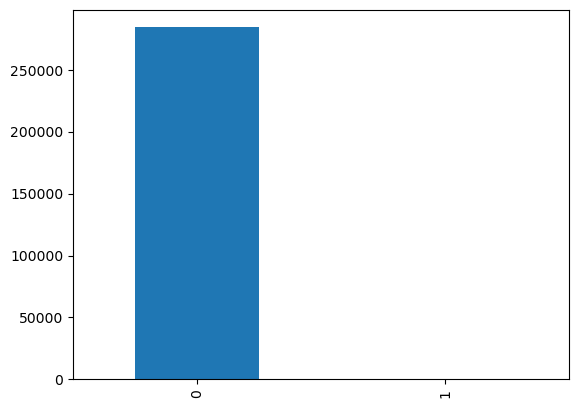

In [58]:
df.Class.value_counts().plot(kind='bar')


In [59]:
plt.pie(c,labels=['Not Fraud','Fraud'],explode=[0,0.15])

NameError: name 'c' is not defined

In [ ]:
c=df['Class'].value_counts()

In [ ]:
c

8. Check the maximum and minimum fraudulent amount.

In [ ]:
x=df[df['Class']==1]['Amount']

In [ ]:
x.max()

In [ ]:
x.min()

9. Check the number of transactions where the transaction amount is zeroand 
consider as a fraud transaction.

In [ ]:
df[df['Amount']==0]

In [ ]:
for i in df.index:
    if df['']:
        df['Class']=0

In [ ]:
df['Class'].value_counts()

In [ ]:
df

10. Check the distribution of columns. List down columns that are normally
distributed. List down columns that are not normally distributed

In [ ]:
for i in df.columns:
    print(i,stats.shapiro(df[i]))

In [ ]:
#non of the columns follow normal distibution

11. List down columns that are highly skewed.


In [ ]:
for i in df.columns:
    if stats.skew(df[i])>1 or stats.skew(df[i])<-1:
        print(i,stats.skew(df[i]))

12. With the help of a standard scaler, normalize the respective column
distribution.

In [61]:
sc=StandardScaler()

In [63]:
sc.fit_transform(df['Class'].values.reshape(-1,1))

array([[-0.04159898],
       [-0.04159898],
       [-0.04159898],
       ...,
       [-0.04159898],
       [-0.04159898],
       [-0.04159898]])

In [64]:
for i in df.columns:
    if stats.skew(df[i])>1 or stats.skew(df[i])<-1:
        df[i]=sc.fit_transform(df[i].values.reshape(-1,1))

In [65]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,1.378155,-0.245117,0.347068,0.193679,0.082637,0.363787,...,-0.024923,0.277838,-0.176911,0.066928,0.128539,-0.189115,0.330892,-0.063781,0.244964,-0.041599
1,0.0,0.608496,0.161176,0.109797,0.448154,0.043483,-0.061820,-0.063700,0.071253,-0.255425,...,-0.307377,-0.638672,0.162201,-0.339846,0.167170,0.125895,-0.022256,0.044608,-0.342475,-0.041599
2,1.0,-0.693500,-0.811578,1.169468,0.379780,-0.364572,1.351454,0.639776,0.207373,-1.514654,...,0.337632,0.771679,1.456320,-0.689281,-0.327642,-0.139097,-0.137137,-0.181021,1.160686,-0.041599
3,1.0,-0.493325,-0.112169,1.182516,-0.863291,-0.007469,0.936150,0.192071,0.316018,-1.387024,...,-0.147443,0.005274,-0.304777,-1.175575,0.647376,-0.221929,0.155396,0.186189,0.140534,-0.041599
4,2.0,-0.591330,0.531541,1.021412,0.403034,-0.295015,0.071999,0.479302,-0.226510,0.817739,...,-0.012839,0.798278,-0.220123,0.141267,-0.206010,0.502292,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-6.065842,6.099286,-6.486245,-2.066656,-3.886611,-1.956690,-3.975628,6.116573,1.914428,...,0.290602,0.111864,1.624574,-0.509348,1.436807,0.250034,2.337901,2.495529,-0.350151,-0.041599
284803,172787.0,-0.374121,-0.033356,1.342145,-0.738589,0.629040,0.794446,0.019667,0.246886,0.584800,...,0.291625,0.924384,0.019958,-1.016226,-0.606624,-0.395255,0.169641,-0.162164,-0.254117,-0.041599
284804,172788.0,0.980024,-0.182434,-2.143205,-0.557828,1.905833,2.275262,-0.239939,0.593140,0.432454,...,0.315913,0.578229,-0.060053,0.640134,0.265745,-0.087371,0.011037,-0.080467,-0.081839,-0.041599
284805,172788.0,-0.122755,0.321250,0.463320,0.689799,-0.273836,0.468155,-0.554672,0.568631,0.392087,...,0.361112,0.800049,-0.261503,0.123205,-0.569159,0.546668,0.269604,0.316687,-0.313249,-0.041599


13. List down columns that have high kurtosis.

In [68]:
for i in df.columns:
    if stats.kurtosis(df[i])>3:
        print(i,stats.kurtosis(df[i]))

V1 32.48608809408268
V2 95.77140353674746
V3 26.619062415704
V5 206.9009065435791
V6 42.64172427850535
V7 405.600275234841
V8 220.58308000798263
V9 3.7312240416893516
V10 31.98765613795981
V12 20.241493235979792
V14 23.879021558354037
V16 10.418927339073313
V17 94.79803376532585
V20 271.0113340163206
V21 207.28338022529644
V23 440.0809115603962
V25 4.290315895267902
V27 244.9849185511875
V28 933.3810946181532
Amount 845.0777883188747
Class 573.8777467351646


14. What is the distribution of Time and Amount columns in the dataset ?

In [69]:
df[['Time','Amount']].describecribe()

,Time,Amount
count,284807.000000,2.848070e+05
mean,94813.859575,2.913952e-17
std,47488.145955,1.000002e+00
min,0.000000,-3.532294e-01
25%,54201.500000,-3.308401e-01
50%,84692.000000,-2.652715e-01
75%,139320.500000,-4.471707e-02
max,172792.000000,1.023622e+02


15. Find the distribution of all variables with respect to the outcome ‘Class’
variable.

In [70]:
df.groupby('Class').describe()

Time                                                       \
               count          mean           std    min      25%      50%   
Class                                                                       
-0.041599   284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
 24.039052     492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                      V1            ...       V28              \
                 75%       max     count      mean  ...       75%         max   
Class                                               ...                         
-0.041599   139333.0  172792.0  284315.0  0.004216  ...  0.236188  102.543421   
 24.039052  128483.0  170348.0     492.0 -2.436293  ...  1.154716    5.390661   

              Amount                                                    \
               count      mean       std       min       25%       50%   
Class                                                                    
-0.041599   284315.0 -0.000234  0.999942 -0.353229 -0.330640 -0.265271   
 24.039052     492.0  0.135382  1.026242 -0.353229 -0.349231 -0.316247   

                                  
                 75%         max  
Class                             
-0.041599  -0.045177  102.362243  
 24.039052  0.070128    8.146182  

[2 rows x 240 columns]

16. Create a countplot for the outcome class in seaborn using percentage
instead of count for each bar

In [74]:
sns.countplot(data=df['Class'],hue=df['Class'])

ValueError: Cannot use `hue` without `x` and `y`

<Axes: xlabel='Class'>

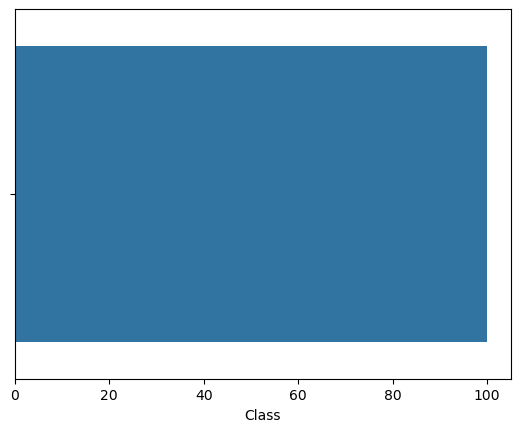

In [76]:

sns.barplot(x='Class', data=df, estimator=lambda x: len(x) / len(df) * 100)


17. Plot a heatmap for correlation matrix for the given dataset. Write the
Observation. Especially note down columns that are highly correlated
(Positive and Negative Correlation, Consider 0.7 to 1 as high).

<Axes: >

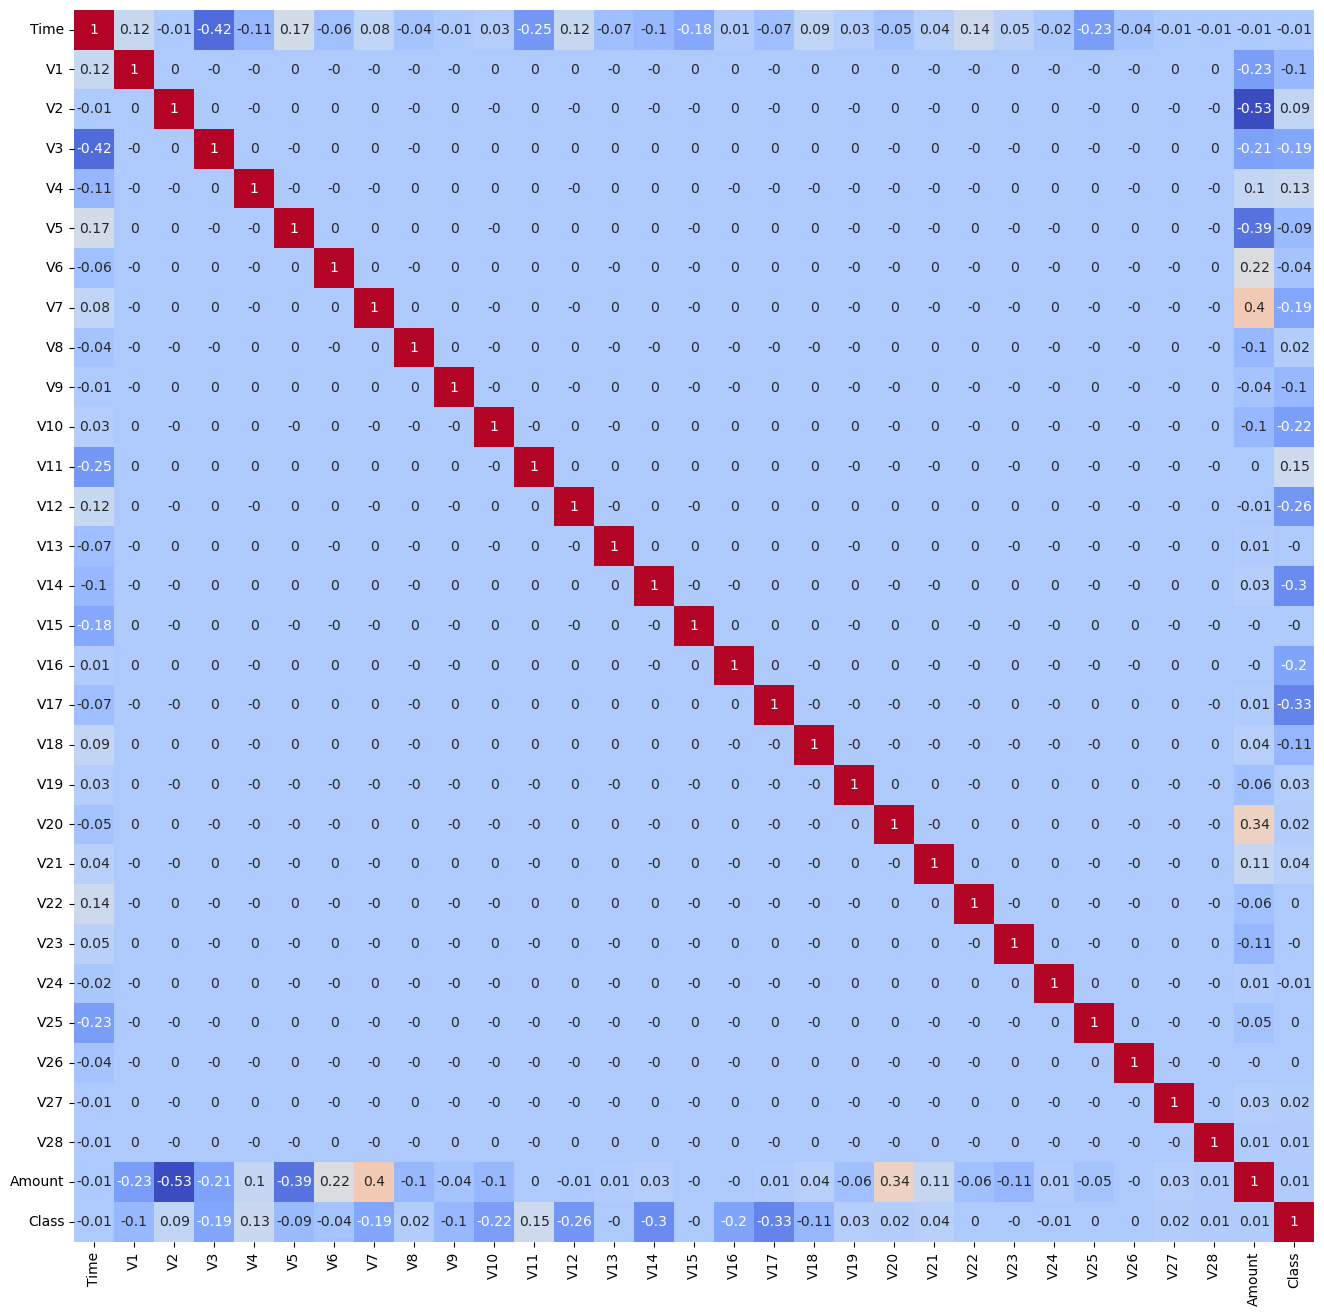

In [94]:
plt.figure(figsize=[16,16])
sns.heatmap(cor,annot=True,cmap='coolwarm',cbar=False)

In [93]:
cor=round(df.corr(),2)
cor['Class']

Time     -0.01
V1       -0.10
V2        0.09
V3       -0.19
V4        0.13
V5       -0.09
V6       -0.04
V7       -0.19
V8        0.02
V9       -0.10
V10      -0.22
V11       0.15
V12      -0.26
V13      -0.00
V14      -0.30
V15      -0.00
V16      -0.20
V17      -0.33
V18      -0.11
V19       0.03
V20       0.02
V21       0.04
V22       0.00
V23      -0.00
V24      -0.01
V25       0.00
V26       0.00
V27       0.02
V28       0.01
Amount    0.01
Class     1.00
Name: Class, dtype: float64

there are no columns that are correlated 

18. With the help of hypothesis testing check whether fraudulent transactions 
of higher value than normal transactions? 

In [97]:
fraud = df[df['Class']==1]['Amount']
normal = df[df['Class']==0]['Amount']

In [98]:
stats.ttest_ind(fraud,normal)

Ttest_indResult(statistic=3.00555231397141, pvalue=0.002651220649191683)

19. Perform ANOVA test for Statistical feature selection.

In [100]:
x=df.drop('Class',axis=1)
y=df['Class']
#stats.f(x,y)

20. Split the dataset randomly into train and test datasets. Use a train -testratio 
of 70:30 ratio.

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [103]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
275707,166685.0,-0.188005,1.031550,0.136099,-0.671405,0.487072,-1.069454,0.999546,-0.202422,0.113096,...,0.111858,-0.297476,-0.595259,0.069883,-0.113096,-0.404649,0.151507,0.354429,0.159839,1.29
69905,53631.0,0.505478,-0.866189,-0.206414,1.370243,-0.263338,-0.021625,0.576461,-0.112282,-0.041274,...,0.584107,0.041603,-0.688058,-0.308830,-0.450012,0.317183,-0.514278,-0.037883,0.081969,375.34
50155,44371.0,1.277796,-0.310302,0.239536,-0.098218,-0.762991,-0.896700,-0.108304,-0.183387,-1.170163,...,-0.529312,-0.724052,-1.699681,0.318403,0.325847,-0.027751,0.099941,-0.024162,0.019606,30.05
98374,66639.0,-0.319760,0.840584,1.266859,0.771191,-0.521830,-0.176534,0.074817,0.236407,0.079428,...,-0.074154,-0.119738,-0.059446,0.400281,0.423894,-1.641400,0.069978,-0.145148,-0.041295,10.00
237172,149127.0,-1.487215,0.752813,0.919604,-2.498168,-0.524987,-0.941033,0.296296,0.107296,1.518823,...,-0.092808,0.243172,0.939643,-0.270615,0.121266,-0.187057,0.515589,-0.265595,0.025687,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219104,141601.0,-3.145454,-3.182640,1.865702,-0.982297,2.448502,-1.652453,-0.668206,-0.316767,-0.208462,...,-1.058895,-0.949024,-1.513451,-0.708851,0.050293,0.486265,-0.007680,0.025113,-0.629965,163.35
241456,151032.0,-2.838966,0.396771,-0.623269,1.185645,-1.141179,0.349028,-0.462681,1.498929,-0.207421,...,0.181481,0.514892,1.262116,-0.450034,0.814841,-0.113595,-0.300686,0.425413,-0.038042,156.42
189687,128513.0,-1.092553,-0.097172,1.302428,0.977865,0.449298,0.178739,0.374746,0.185199,-0.126182,...,0.704817,0.369939,0.808169,0.195471,0.558927,0.139393,-0.383123,0.362910,0.246093,160.00
172423,121094.0,-2.370268,-1.465539,-0.855700,0.234437,3.817179,-1.787477,0.216153,-0.227568,-0.573893,...,-0.726127,0.145900,0.613340,-0.473967,0.268163,-0.157722,-0.741381,0.024968,0.558610,59.88
